# Bloom Filter Benchmarking

Benchmarking refers to the process of testing and evaluating the performance, reliability, or other attributes of a bloom filter under controlled conditions. This basically is the process of performance evaluation under different conditions.

## Importance of Benchmarking the Bloom Filter:

* **Insertion and checking Times:** Benchmarking helps measure how long it takes to insert elements into the Bloom filter and query for their presence. This helps in understanding the practical efficiency of the implementated filter.

* **Accuracy Testing:** Benchmarking helps validate the expected false positive rate against actual performance. It helps in verifying that the Bloom filter behaves as expected under different settings.

* **Scalability Assessment:** Benchmarking helps determine the Bloom filter's performance as the number of elements  inserted or queried increases. This evaluates how the false positive rate changes with varying loads.

## What is covered in the Benchmarking process
Here we evaluated for the following:
* how the false positive rate changes as a function of the number of words inserted in the filter
* check this if the number of words exceeds the expected number of words for which the filter was designed.
* how the compression rate of a filter as a function of the expected number of and the rate of false positives.
* how the parameters mentioned above vary with different number of hash functions

In [33]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_line, geom_point,
                      geom_text, labs, theme, element_text,
                      theme_bw, scale_color_manual)


In [69]:
df5 = pd.read_csv("dataframe_words_5.csv", index_col=0)
df10 = pd.read_csv("dataframe_words_10.csv", index_col=0)
df15 = pd.read_csv("dataframe_words_15.csv", index_col=0)
df20 = pd.read_csv("dataframe_words_20.csv", index_col=0)
df25 = pd.read_csv("dataframe_words_25.csv", index_col=0)
df25 = pd.read_csv("dataframe_words_25.csv", index_col=0)
dfo5 = pd.read_csv("dataframe_words_5_overload.csv", index_col=0)


df5.head()

,input_size,insertion_time,checking_time,fpr,cpr,uniform,independent
0,10000,0.023481,0.022223,2.759240e-07,69.314718,True,True
1,20000,0.046677,0.044220,7.804248e-06,34.657359,True,True
2,30000,0.069921,0.067522,5.243620e-05,23.104906,True,True
3,40000,0.093731,0.089016,1.957134e-04,17.328680,True,True
4,50000,0.116609,0.110641,5.295634e-04,13.862944,True,True


## How insertion time varies with increasing number of inputs

To evaluate how insertion time varies with increasing number of inputs the strings of size upto 1000000 are used. The strings rae randomly generated words or DNA sequences of varying lengths. Performed multiple runs for each input size ranging from 0 to 1000000 to account for the variability and the results are averaged. To visualize the results the insertion time is plotted against the increasing number of inputs. The insertion time grows linearly (O(n)) as the as the size of the input (n) increases. Since each insertion requires computing multiple hash functions and updating the bit array, this behaviour is as expected. The efficiency of the Bloom filter for using large-scale data insertion tasks is accomplished by the fact that the insertion time for 1,000,000 elements is taken approximately 2 seconds. This result can help with understanding the performance implications for large datasets and optimising the Bloom filter parameters based on particular use cases.


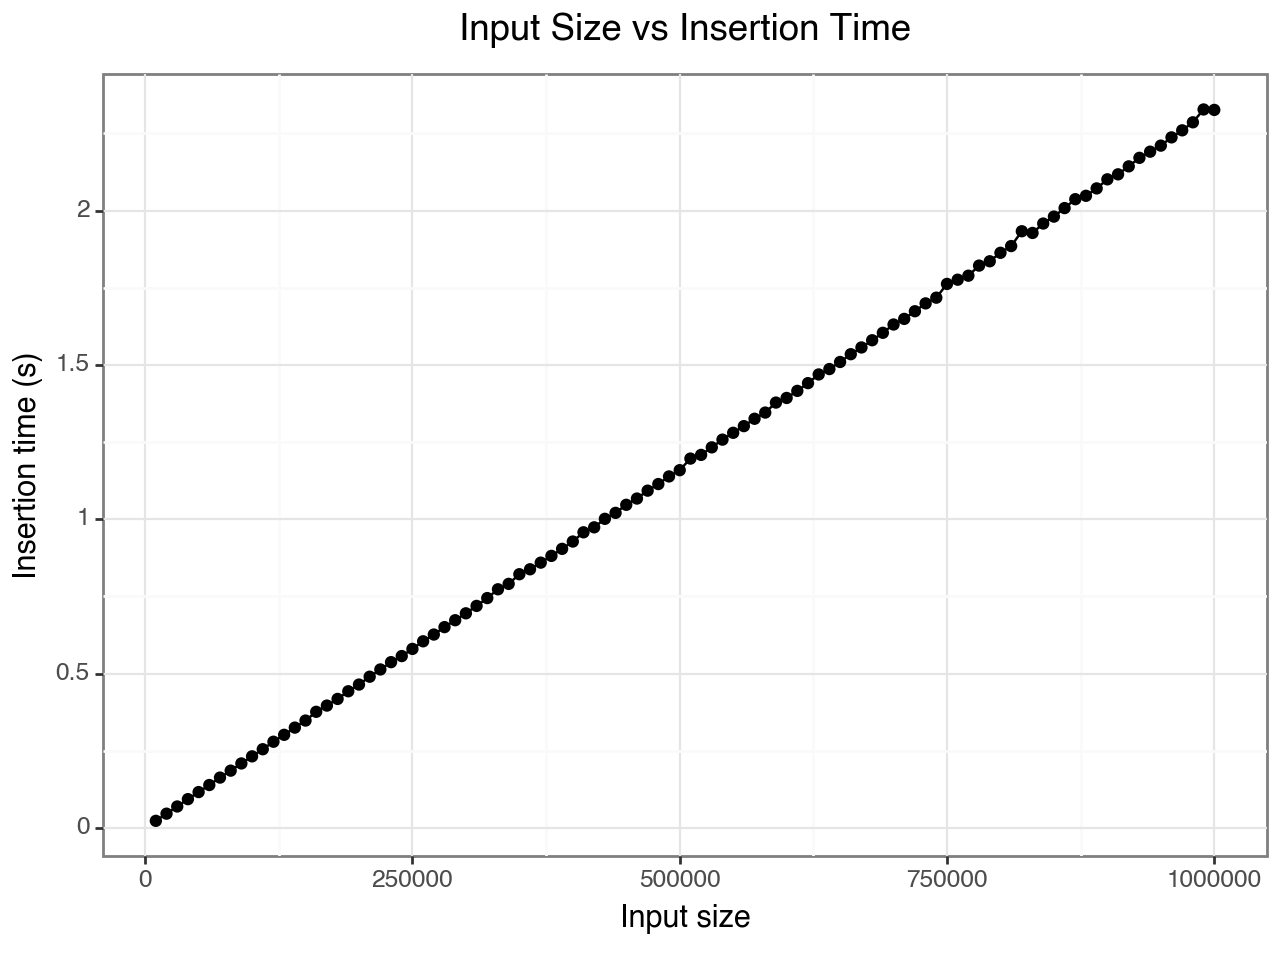

In [25]:

plot1 = ggplot(df5) + aes(x="input_size", y="insertion_time") + geom_line() + theme_bw() + geom_point()
plot1 = plot1 + labs(x="Input size", y="Insertion time (s)", title="Input Size vs Insertion Time") 
plot1 = plot1 + theme(plot_title=element_text(hjust=0.5))
print(plot1)

## How checking time varies with increasing number of items to check

Similar to the benchmarking done for insertion following graphs show how the search times rise linearly with the number of elements. The time complexity of checking time operation in a Bloom filter is defined by O(n), where n is the number of elements, as indicated by the linear increase in both the search times and size of the item. The results for search operation is similar to the insertion time which is 2 seconds for an input size of 1000000. This ensures the Bloom filter's efficiency for large-scale data operations.

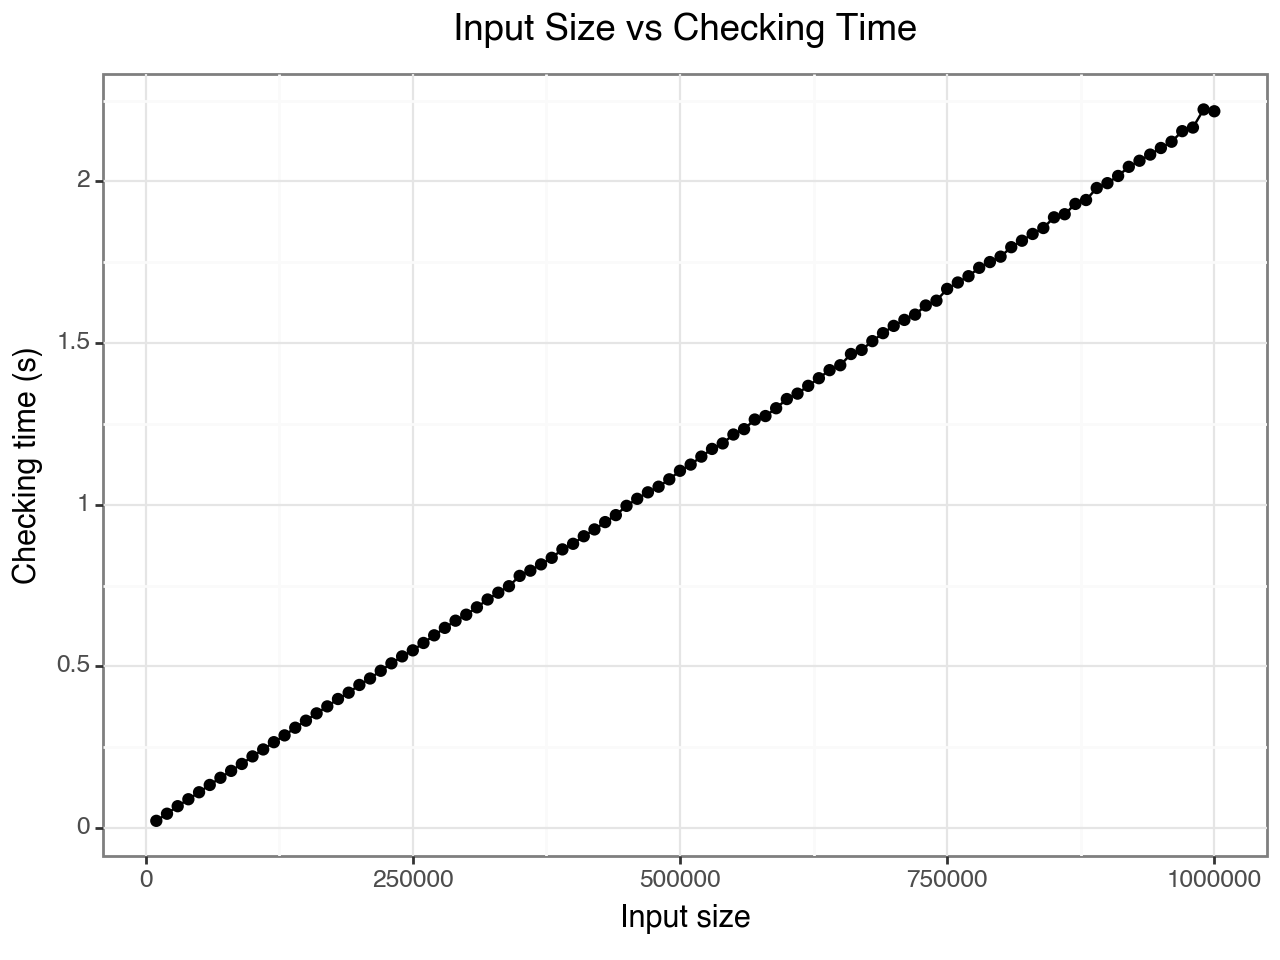

In [26]:
plot2 = ggplot(df5) + aes(x="input_size", y="checking_time") + geom_line() + theme_bw() + geom_point()
plot2 = plot2 + labs(x="Input size", y="Checking time (s)", title="Input Size vs Checking Time") 
plot2 = plot2 + theme(plot_title=element_text(hjust=0.5))
print(plot2)

## How number of False positives vary with increasing number of items

The false positive rate \( fpr \) is given by the formula:

$$
fpr = \left(1 - \left(1 - \frac{1}{m}\right)^{kn}\right)^k
$$

where 
- m is the bit array size
- k is the number of hash functions
- n is the number of inputs.

The formular above shows that the fpr does not have a linear relationship with the number of inputs, n. Given that we currently have the same k and m, the fpr value changes based on the number of inputs. he figure below shows at at the starting phase, that is when the number of inputs are still small, the fpr value is very small, very close to zero. This can be explained by the fact that with a small number of inputs at the start, all the bit of the array are set to 0, and the chance of a hash collision is minimal.

As the number of elements approaches the capacity of the Bloom filter, the false positive rate increases more exponentially. This is due to a higher number of bits being set to 1, increasing the chance that a random element will hash to a set of bits that are all 1s, the chance of collision increases as the number of inputs approach the cacpacity of the filter. This is illustrated in the figure below.


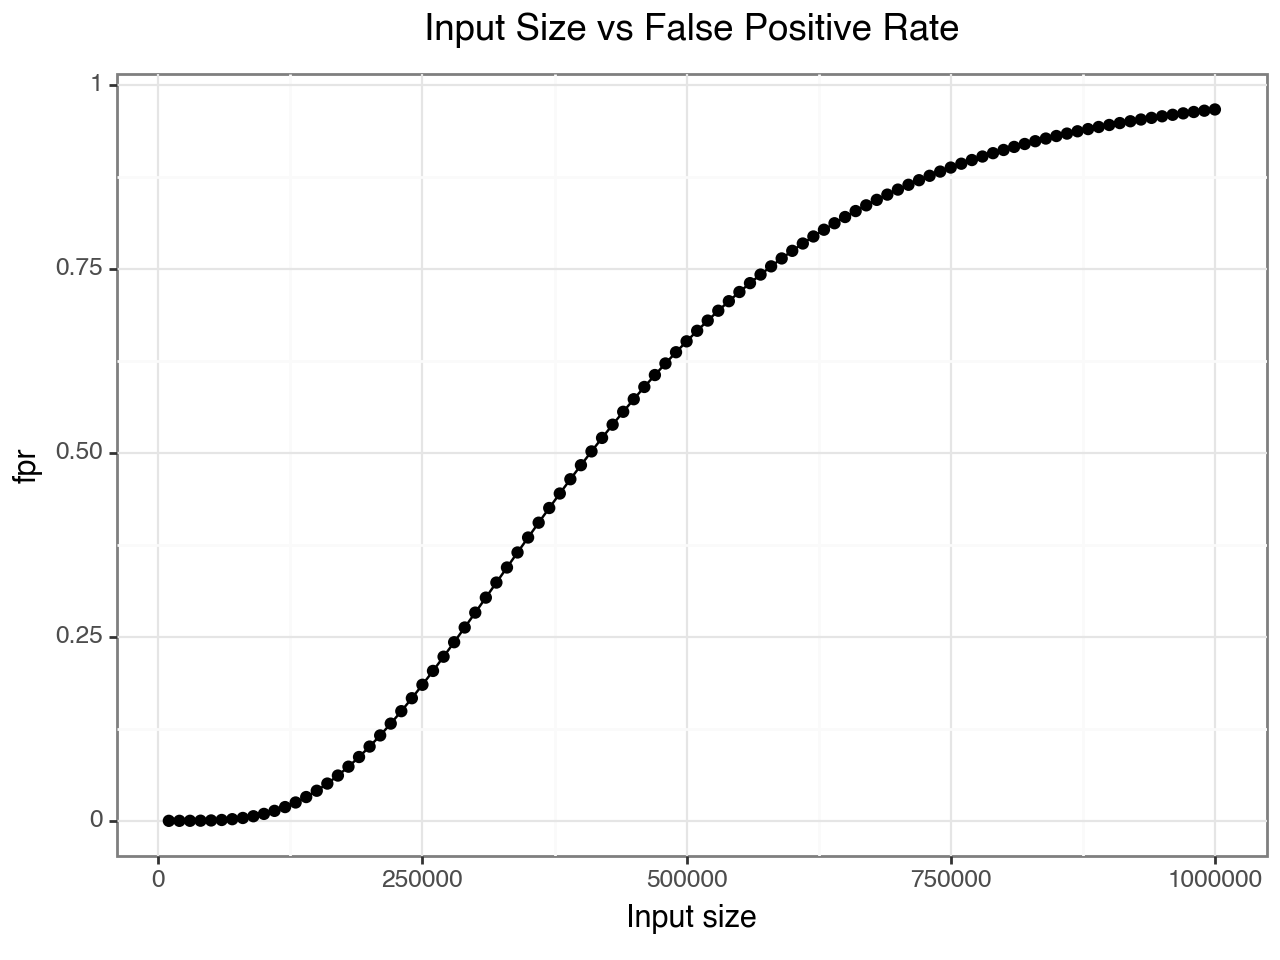

In [27]:
plot3 = ggplot(df5) + aes(x="input_size", y="fpr") + geom_line() + theme_bw() + geom_point()
plot3 = plot3 + labs(x="Input size", y="fpr", title="Input Size vs False Positive Rate") 
plot3 = plot3 + theme(plot_title=element_text(hjust=0.5))
print(plot3)

## How the compression vary with increasing number of items

The compression rate measures how many bits are used per element stored in the filter. While keeping the bit array size constant, the compression rate decreases with increasing number of inputs. The Bloom filter's bit array becomes more saturated, when the number of items increases requiring more bits to maintain the same false positive rate through out. Either the bit array size (m) or the number of hash functions (k) need to be increased to ensure the low false positive rate as the number of items (n) increases.

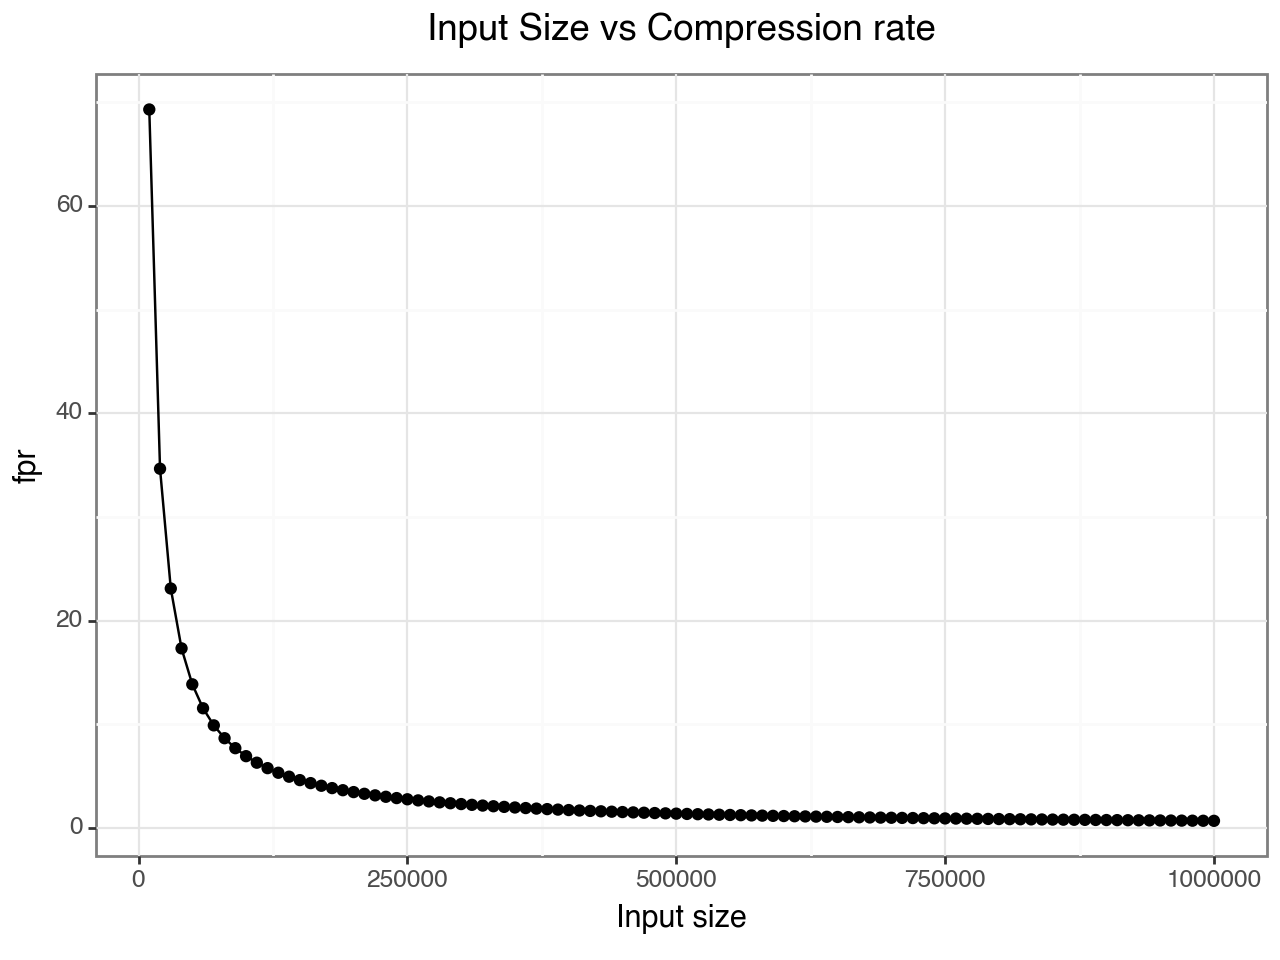

In [ ]:
plot4 = ggplot(df5) + aes(x="input_size", y="cpr") + geom_line() + theme_bw() + geom_point()
plot4 = plot4 + labs(x="Input size", y="fpr", title="Input Size vs Compression rate") 
plot4 = plot4 + theme(plot_title=element_text(hjust=0.5))
print(plot4)

## How insertion time varies with increasing number of inputs for varying number hash functions

The number of hash functions 'k' determines the number of positions in the bit array an element holds while the insertion process. As the number of hash functions increases it generally reduce the false positive rate but may increase insertion time due to multiple hash computations per element. The below figure depicts the usage of varying hash functions which are 5, 10, 15, 20 and 25. It is also evident that for the increasing number of hash functions for a given size of 1000000, the time of insertion varies beyond 10 seconds. However, when the number of hash functions k increases it typically leads to even distribution of bits across the bit array, in turn reducing collisions.


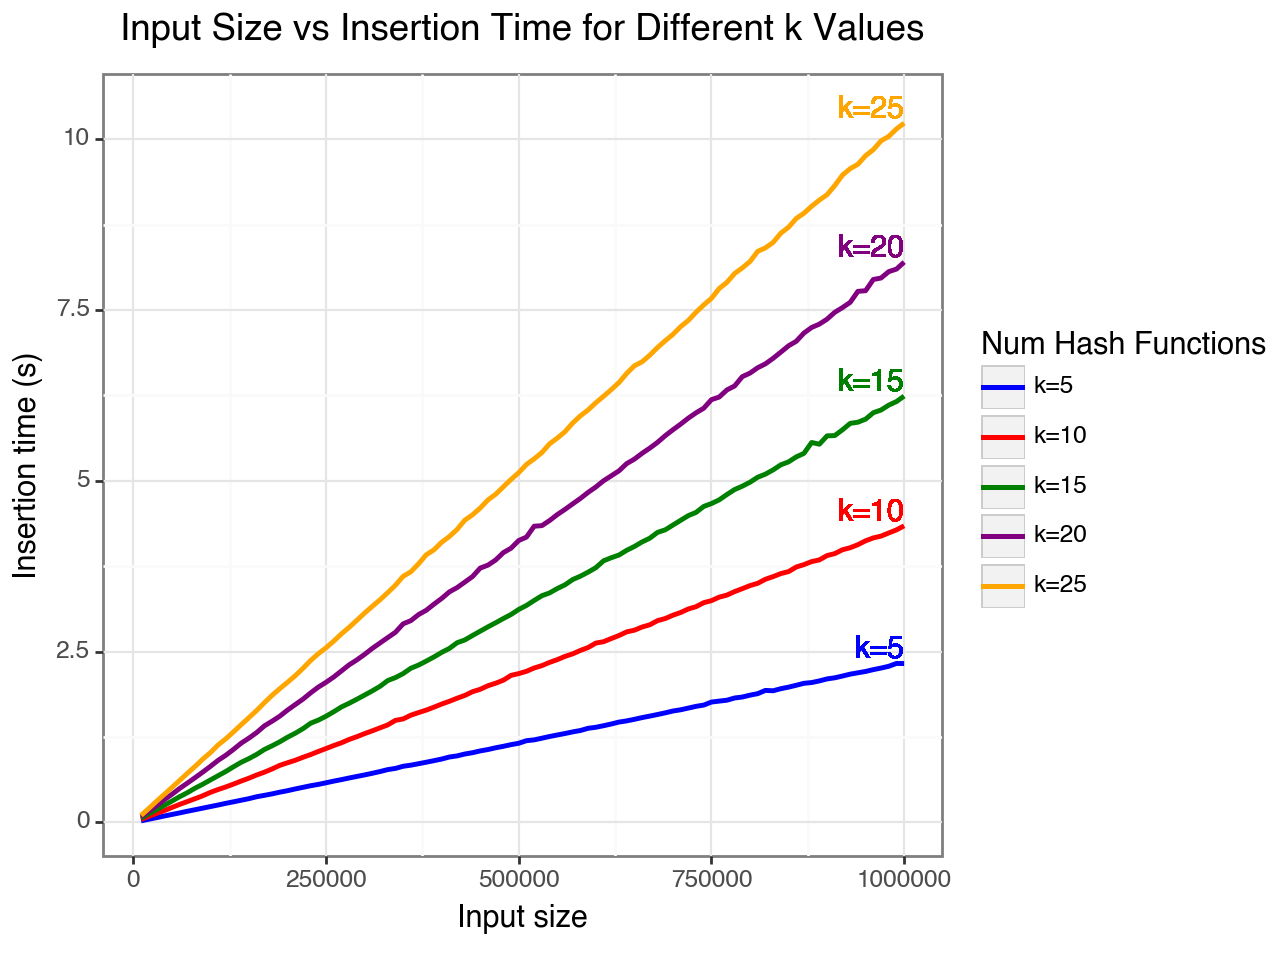

In [55]:
plot5 = (
    ggplot() +
    geom_line(data=df5, mapping=aes(x="input_size", y="insertion_time", color="'k=5'"), size=1) + 
    geom_line(data=df10, mapping=aes(x="input_size", y="insertion_time", color="'k=10'"), size=1) + 
    geom_line(data=df15, mapping=aes(x="input_size", y="insertion_time", color="'k=15'"), size=1) + 
    geom_line(data=df20, mapping=aes(x="input_size", y="insertion_time", color="'k=20'"), size=1) +
    geom_line(data=df25, mapping=aes(x="input_size", y="insertion_time", color="'k=25'"), size=1) + 
    geom_text(data=df5, mapping=aes(x=max(df5['input_size']), y=max(df5['insertion_time']) + 0.2, label="'k=5'"), color="blue", ha='right') +
    geom_text(data=df10, mapping=aes(x=max(df10['input_size']), y=max(df10['insertion_time']) + 0.2, label="'k=10'"), color="red", ha='right') +
    geom_text(data=df15, mapping=aes(x=max(df15['input_size']), y=max(df15['insertion_time']) + 0.2, label="'k=15'"), color="green", ha='right') +
    geom_text(data=df20, mapping=aes(x=max(df20['input_size']), y=max(df20['insertion_time']) + 0.2, label="'k=20'"), color="purple", ha='right') +
    geom_text(data=df25, mapping=aes(x=max(df25['input_size']), y=max(df25['insertion_time']) + 0.2, label="'k=25'"), color="orange", ha='right') +
    labs(x="Input size", y="Insertion time (s)", title="Input Size vs Insertion Time for Different k Values") +
    scale_color_manual(name="Num Hash Functions", values={"k=5":"blue", "k=10":"red", "k=15":"green", "k=20":"purple", "k=25":"orange"}) +
    theme_bw() +
    theme(plot_title=element_text(hjust=0.5))
)

print(plot5)

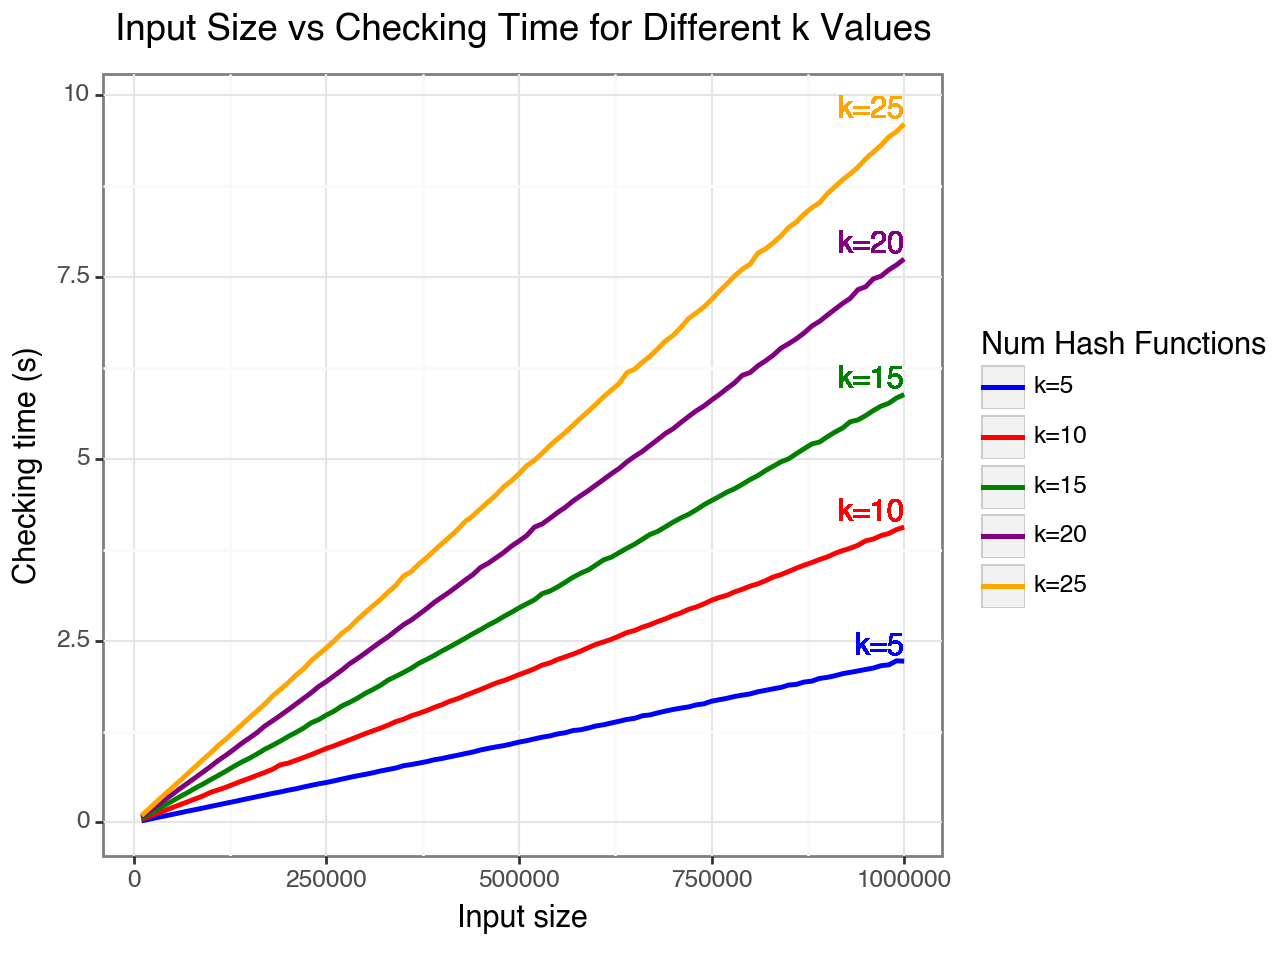

In [56]:
plot6 = (
    ggplot() +
    geom_line(data=df5, mapping=aes(x="input_size", y="checking_time", color="'k=5'"), size=1) + 
    geom_line(data=df10, mapping=aes(x="input_size", y="checking_time", color="'k=10'"), size=1) + 
    geom_line(data=df15, mapping=aes(x="input_size", y="checking_time", color="'k=15'"), size=1) + 
    geom_line(data=df20, mapping=aes(x="input_size", y="checking_time", color="'k=20'"), size=1) +
    geom_line(data=df25, mapping=aes(x="input_size", y="checking_time", color="'k=25'"), size=1) + 
    geom_text(data=df5, mapping=aes(x=max(df5['input_size']), y=max(df5['checking_time']) + 0.2, label="'k=5'"), color="blue", ha='right') +
    geom_text(data=df10, mapping=aes(x=max(df10['input_size']), y=max(df10['checking_time']) + 0.2, label="'k=10'"), color="red", ha='right') +
    geom_text(data=df15, mapping=aes(x=max(df15['input_size']), y=max(df15['checking_time']) + 0.2, label="'k=15'"), color="green", ha='right') +
    geom_text(data=df20, mapping=aes(x=max(df20['input_size']), y=max(df20['checking_time']) + 0.2, label="'k=20'"), color="purple", ha='right') +
    geom_text(data=df25, mapping=aes(x=max(df25['input_size']), y=max(df25['checking_time']) + 0.2, label="'k=25'"), color="orange", ha='right') +
    labs(x="Input size", y="Checking time (s)", title="Input Size vs Checking Time for Different k Values") +
    scale_color_manual(name="Num Hash Functions", values={"k=5":"blue", "k=10":"red", "k=15":"green", "k=20":"purple", "k=25":"orange"}) +
    theme_bw() +
    theme(plot_title=element_text(hjust=0.5))
)

print(plot6)

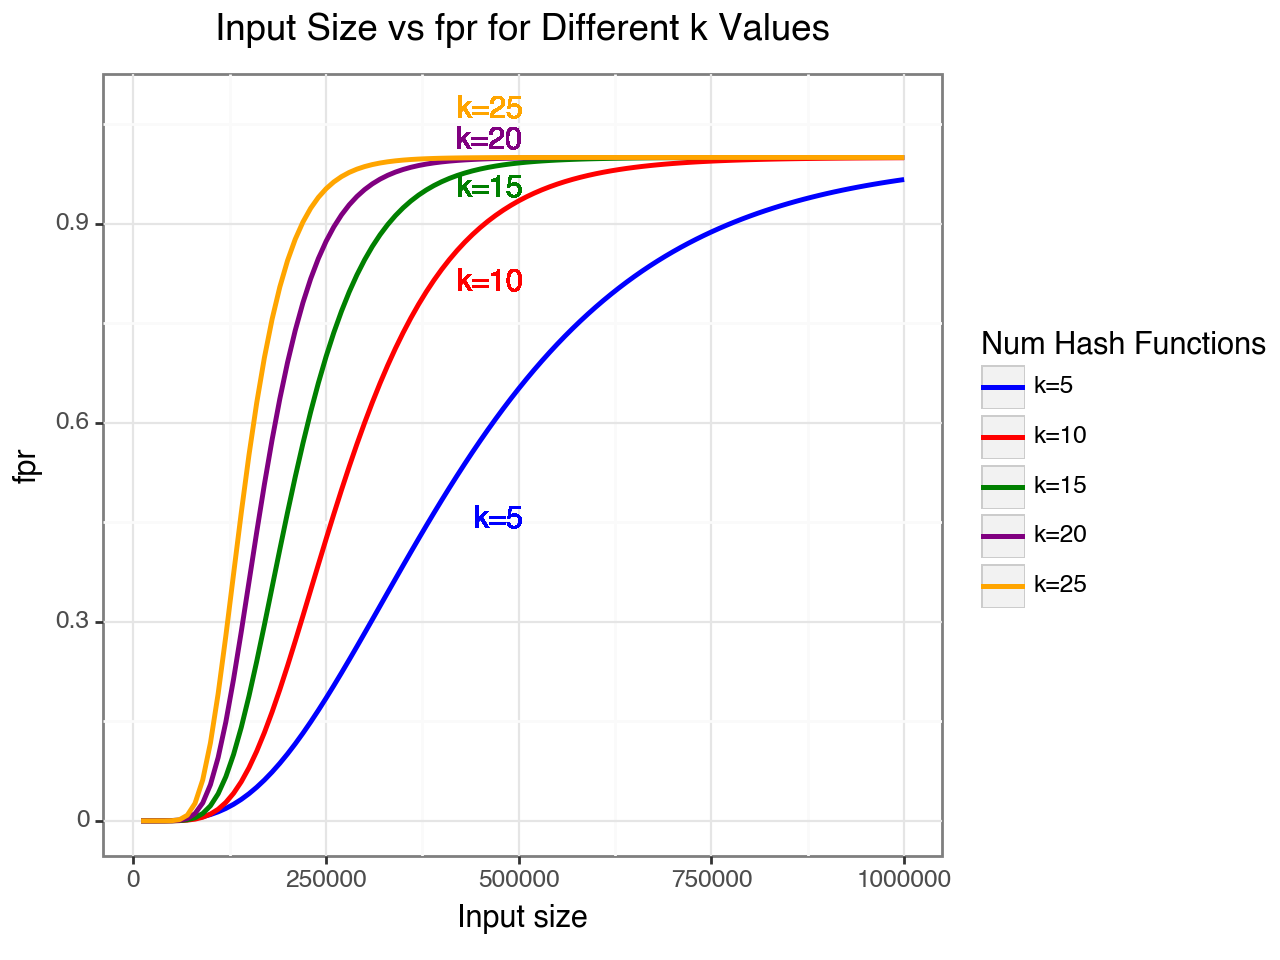

In [68]:
plot7 = (
    ggplot() +
    geom_line(data=df5, mapping=aes(x="input_size", y="fpr", color="'k=5'"), size=1) + 
    geom_line(data=df10, mapping=aes(x="input_size", y="fpr", color="'k=10'"), size=1) + 
    geom_line(data=df15, mapping=aes(x="input_size", y="fpr", color="'k=15'"), size=1) + 
    geom_line(data=df20, mapping=aes(x="input_size", y="fpr", color="'k=20'"), size=1) +
    geom_line(data=df25, mapping=aes(x="input_size", y="fpr", color="'k=25'"), size=1) + 
    geom_text(data=df5, mapping=aes(x=np.mean(df5['input_size']), y=np.mean(df5['fpr']) - 0.1, label="'k=5'"), color="blue", ha='right') +
    geom_text(data=df10, mapping=aes(x=np.mean(df10['input_size']), y=np.mean(df10['fpr']) + 0.1, label="'k=10'"), color="red", ha='right') +
    geom_text(data=df15, mapping=aes(x=np.mean(df15['input_size']), y=np.mean(df15['fpr']) + 0.17, label="'k=15'"), color="green", ha='right') +
    geom_text(data=df20, mapping=aes(x=np.mean(df20['input_size']), y=np.mean(df20['fpr']) + 0.2, label="'k=20'"), color="purple", ha='right') +
    geom_text(data=df25, mapping=aes(x=np.mean(df25['input_size']), y=np.mean(df25['fpr']) + 0.22, label="'k=25'"), color="orange", ha='right') +
    labs(x="Input size", y="fpr", title="Input Size vs fpr for Different k Values") +
    scale_color_manual(name="Num Hash Functions", values={"k=5":"blue", "k=10":"red", "k=15":"green", "k=20":"purple", "k=25":"orange"}) +
    theme_bw() +
    theme(plot_title=element_text(hjust=0.5))
)

print(plot7)

## How the `fpr` behaves when the number of words exceeds the expected number of words for which the filter was designed

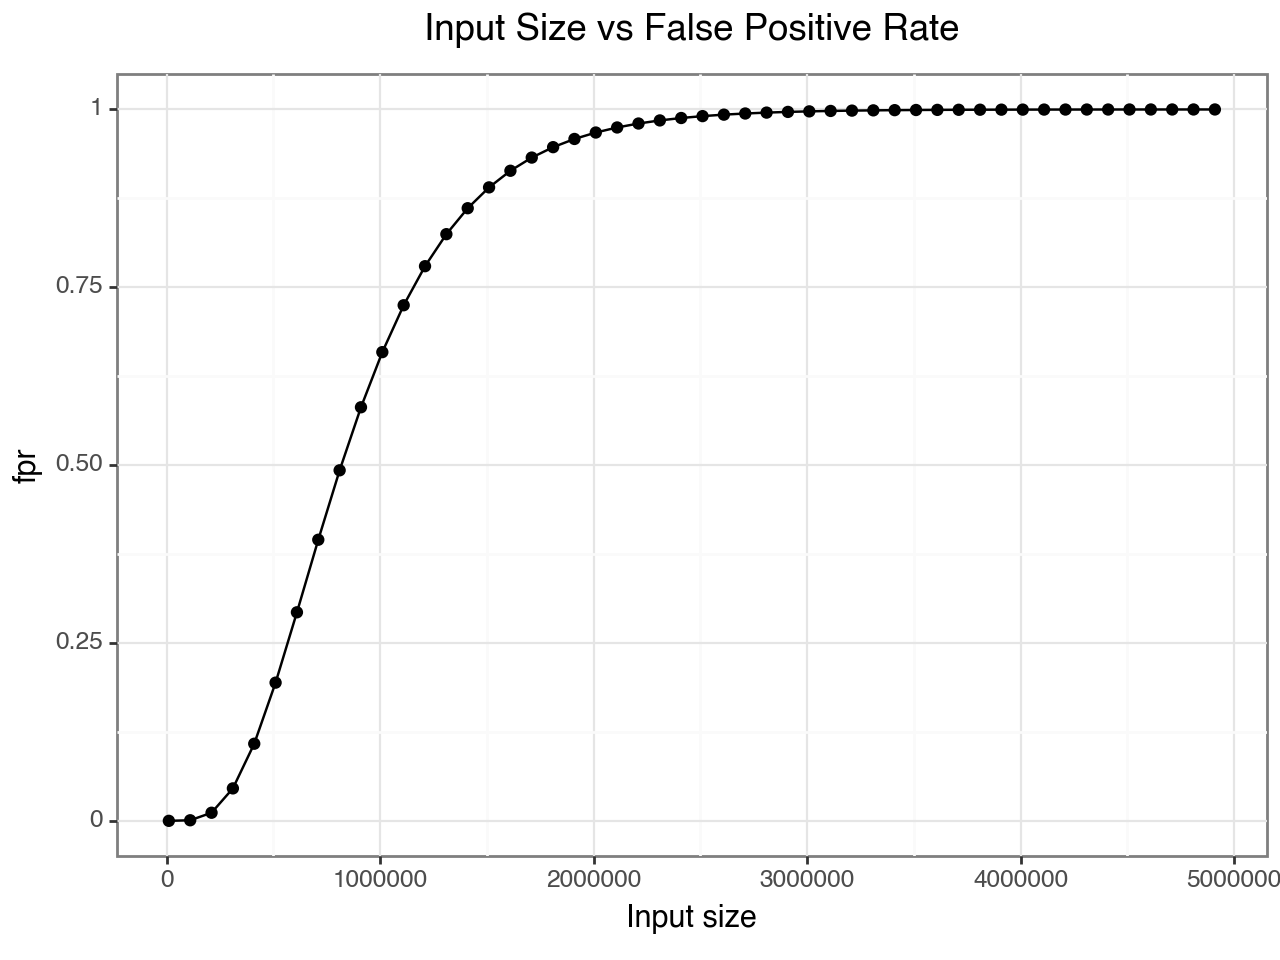

In [72]:
plot7 =  ggplot(dfo5) + aes(x="input_size", y="fpr") + geom_line() + theme_bw() + geom_point()
plot7 = plot7 + labs(x="Input size", y="fpr", title="Input Size vs False Positive Rate") 
plot7 = plot7 + theme(plot_title=element_text(hjust=0.5))
print(plot7)